In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [228]:
Riquezacomuna = pd.read_csv("Riqueza_Comuna.csv", sep = ",", header = 0)

In [229]:
Riquezacomuna.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [230]:
muertes = pd.read_csv('DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv', sep = ';', encoding = 'latin-1')

In [231]:
muertes.columns = ['ANO_DEF','FECHA_DEF','GLOSA_SEXO','EDAD_TIPO','EDAD_CANT','CODIGO_COMUNA_RESIDENCIA','GLOSA_COMUNA_RESIDENCIA','GLOSA_REG_RES','DIAG1','CAPITULO_DIAG1','GLOSA_CAPITULO_DIAG1','CODIGO_GRUPO_DIAG1','GLOSA_GRUPO_DIAG1','CODIGO_CATEGORIA_DIAG1','GLOSA_CATEGORIA_DIAG1','CODIGO_SUBCATEGORIA_DIAG1','GLOSA_SUBCATEGORIA_DIAG1','DIAG2','CAPITULO_DIAG2','GLOSA_CAPITULO_DIAG2','CODIGO_GRUPO_DIAG2','GLOSA_GRUPO_DIAG2','CODIGO_CATEGORIA_DIAG2','GLOSA_CATEGORIA_DIAG2','CODIGO_SUBCATEGORIA_DIAG2','GLOSA_SUBCATEGORIA_DIAG2',]

In [232]:
print(muertes.dtypes)

ANO_DEF                       int64
FECHA_DEF                    object
GLOSA_SEXO                   object
EDAD_TIPO                     int64
EDAD_CANT                     int64
CODIGO_COMUNA_RESIDENCIA      int64
GLOSA_COMUNA_RESIDENCIA      object
GLOSA_REG_RES                object
DIAG1                        object
CAPITULO_DIAG1               object
GLOSA_CAPITULO_DIAG1         object
CODIGO_GRUPO_DIAG1           object
GLOSA_GRUPO_DIAG1            object
CODIGO_CATEGORIA_DIAG1       object
GLOSA_CATEGORIA_DIAG1        object
CODIGO_SUBCATEGORIA_DIAG1    object
GLOSA_SUBCATEGORIA_DIAG1     object
DIAG2                        object
CAPITULO_DIAG2               object
GLOSA_CAPITULO_DIAG2         object
CODIGO_GRUPO_DIAG2           object
GLOSA_GRUPO_DIAG2            object
CODIGO_CATEGORIA_DIAG2       object
GLOSA_CATEGORIA_DIAG2        object
CODIGO_SUBCATEGORIA_DIAG2    object
GLOSA_SUBCATEGORIA_DIAG2     object
dtype: object


In [233]:
muertes.dropna()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
135,2021,2021-02-10,Mujer,1,85,7108,Río Claro,Del Maule,S069,S00-T98,...,TRAUMATISMO INTRACRANEAL NO ESPECIFICADO,X599,V01-Y98,Causas externas de morbilidad y de mortalidad,X58-X59,Exposición accidental a otros factores y a los...,X59,Exposición a factores no especificados,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...
210,2021,2021-03-03,Mujer,1,82,13123,Providencia,Metropolitana de Santiago,T07X,S00-T98,...,TRAUMATISMOS MULTIPLES NO ESPECIFICADOS,X599,V01-Y98,Causas externas de morbilidad y de mortalidad,X58-X59,Exposición accidental a otros factores y a los...,X59,Exposición a factores no especificados,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...
223,2021,2021-01-25,Hombre,1,83,16101,Chillán,De Ñuble,T175,S00-T98,...,CUERPO EXTRAÑO EN BRONQUIOS,W799,V01-Y98,Causas externas de morbilidad y de mortalidad,W75-W84,Otros accidentes que obstruyen la respración,W79,Inhalación e ingestión de alimento que causa o...,W799,INHALACIÓN E INGESTIÓN DE ALIMENTO QUE CAUSA O...
321,2021,2021-01-18,Mujer,1,93,8312,Tucapel,Del Bíobío,S720,S00-T98,...,FRACTURA DEL CUELLO DEL FÉMUR,W199,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W19,Caída no especificada,W199,CAÍDA NO ESPECIFICADA OCURRIDA EN UN LUGAR NO ...
399,2021,2021-03-22,Hombre,1,82,9111,Nueva Imperial,De La Araucanía,S069,S00-T98,...,TRAUMATISMO INTRACRANEAL NO ESPECIFICADO,W189,V01-Y98,Causas externas de morbilidad y de mortalidad,W00-W19,Caídas,W18,Otras caídas en el mismo nivel,W189,OTRA CAÍDA EN EL MISMO NIVEL OCURRIDA EN UN LU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597072,2016,2016-08-31,Hombre,1,53,14204,Río Bueno,De Los Ríos,T179,S00-T98,...,CUERPO EXTRAÑO EN LAS VÍAS RESPIRATORIAS PARTE...,W780,V01-Y98,Causas externas de morbilidad y de mortalidad,W75-W84,Otros accidentes que obstruyen la respración,W78,Inhalación de contenidos gástricos,W780,INHALACIÓN DE CONTENIDOS GÁSTRICOS OCURRIDA EN...
597090,2016,2016-08-25,Mujer,1,3,10102,Calbuco,De Los Lagos,S071,S00-T98,...,TRAUMATISMO POR APLASTAMIENTO DEL CRANEO,V595,V01-Y98,Causas externas de morbilidad y de mortalidad,V50-V59,Ocupante de camioneta o furgoneta lesionado e...,V59,Ocupante de camioneta o furgoneta lesionado en...,V595,PASAJERO(A) DE CAMIONETA O FURGONETA LESIONADO...
597095,2016,2016-08-28,Mujer,1,38,10101,Puerto Montt,De Los Lagos,T71X,S00-T98,...,ASFIXIA,X708,V01-Y98,Causas externas de morbilidad y de mortalidad,X60-X84,Lesiones autoinfligidas intencionalmente,X70,Lesión autoinfligida intencionalmente por ahor...,X708,LESIÓN AUTOINFLIGIDA INTENCIONALMENTE POR AHOR...
597109,2016,2016-08-30,Hombre,1,43,10101,Puerto Montt,De Los Lagos,T068,S00-T98,...,OTROS TRAUMATISMOS ESPECIFICADOS QUE AFECTAN M...,V093,V01-Y98,Causas externas de morbilidad y de mortalidad,V01-V09,Peatón lesionado en accidente de transporte,V09,Peatón lesionado en otros accidentes de transp...,V093,PEATÓN(A) LESIONADO(A) EN ACCIDENTE DE TRÁNSIT...


In [234]:
muertes.insert(2, 'SEMANAS', 0)

In [235]:
muertes['FECHA_DEF'] = pd.to_datetime(muertes['FECHA_DEF'])

In [236]:
muertes['SEMANAS'] = muertes['FECHA_DEF'].dt.week

<ipython-input-236-000b1c96fe22>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  muertes['SEMANAS'] = muertes['FECHA_DEF'].dt.week


In [237]:
muertes = muertes[muertes.ANO_DEF.isin([2020, 2021])]

In [238]:
muertes_RM = muertes[muertes['GLOSA_REG_RES'] == 'Metropolitana de Santiago']

In [239]:
muertes_RM_COVID = muertes_RM[muertes_RM.GLOSA_SUBCATEGORIA_DIAG1.isin(['COVID-19 virus identificado', 'COVID-19 virus no identificado'])]

In [240]:
muertes_RM_COVID = muertes_RM_COVID.sort_values('FECHA_DEF')

In [241]:
muertes_RM_COVID1 = muertes_RM_COVID[13776:]

In [242]:
muertes_RM_COVID1.head()

,ANO_DEF,FECHA_DEF,SEMANAS,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
123863,2020,2020-12-24,52,Mujer,1,69,13114,Las Condes,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45896,2020,2020-12-24,52,Mujer,1,97,13123,Providencia,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122950,2020,2020-12-24,52,Hombre,1,68,13605,Peñaflor,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85805,2020,2020-12-24,52,Hombre,1,76,13126,Quinta Normal,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159582,2020,2020-12-24,52,Mujer,1,41,13401,San Bernardo,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
muertes_RM_COVID1.insert(3, 'CANTIDAD_FALLECIDOS', 1, allow_duplicates = True)

In [244]:
Contar_muertes_RM_COVID = muertes_RM_COVID1.groupby('CODIGO_COMUNA_RESIDENCIA').count().reset_index()
Contar_muertes_RM_COVID.head()

,CODIGO_COMUNA_RESIDENCIA,ANO_DEF,FECHA_DEF,SEMANAS,CANTIDAD_FALLECIDOS,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
0,13101,158,158,158,158,158,158,158,158,158,...,158,32,0,0,0,0,0,0,0,0
1,13102,51,51,51,51,51,51,51,51,51,...,51,12,0,0,0,0,0,0,0,0
2,13103,113,113,113,113,113,113,113,113,113,...,113,24,0,0,0,0,0,0,0,0
3,13104,105,105,105,105,105,105,105,105,105,...,105,24,0,0,0,0,0,0,0,0
4,13105,113,113,113,113,113,113,113,113,113,...,113,24,0,0,0,0,0,0,0,0


In [245]:
Vacunados = pd.read_csv('Vacunas_2_Dosis.csv', sep = ',', header = 0)

In [246]:
Vacunados.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2281.0,1712.0,886.0,575.0,190.0,1.0,618.0,1054.0,1331.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,1.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,21.0,4.0,6.0,2.0,0.0,7.0,4.0,3.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
Vacunados_RM = Vacunas[Vacunas['Region'] == 'Metropolitana']

In [248]:
Vacunados_RM = Vacunas_RM.dropna()

In [249]:
Vacunados_RM['TOTAL_VACUNADOS'] = Vacunas_RM.iloc[:, 5:201].sum(axis = 1)

In [250]:
Vacunados_RM.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,TOTAL_VACUNADOS
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,100.0,79.0,120.0,104.0,1.0,0.0,77.0,71.0,61.0,5328.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,716.0,1079.0,430.0,232.0,143.0,1.0,358.0,374.0,127.0,59262.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,263.0,167.0,120.0,70.0,9.0,2.0,127.0,72.0,112.0,18539.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,479.0,562.0,358.0,197.0,116.0,6.0,201.0,240.0,314.0,41874.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,989.0,829.0,576.0,364.0,383.0,30.0,439.0,452.0,382.0,58403.0


In [251]:
Vacunados_RM1 = Vacunas_RM.sort_values(by = ['Codigo comuna'])

In [252]:
Vacunados_RM1 = Vacunas_RM1.reset_index()

In [253]:
Resumen = Cuenta_Defunciones_RM_COVID.drop(['ANO_DEF','FECHA_DEF', 'SEMANA','GLOSA_SEXO','EDAD_TIPO','EDAD_CANT', 'GLOSA_COMUNA_RESIDENCIA','GLOSA_REG_RES','DIAG1','CAPITULO_DIAG1',
                                  'GLOSA_CAPITULO_DIAG1','CODIGO_GRUPO_DIAG1','GLOSA_GRUPO_DIAG1','CODIGO_CATEGORIA_DIAG1','GLOSA_CATEGORIA_DIAG1','CODIGO_SUBCATEGORIA_DIAG1',
                                  'GLOSA_SUBCATEGORIA_DIAG1','DIAG2','CAPITULO_DIAG2','GLOSA_CAPITULO_DIAG2','CODIGO_GRUPO_DIAG2','GLOSA_GRUPO_DIAG2','CODIGO_CATEGORIA_DIAG2',
                                  'GLOSA_CATEGORIA_DIAG2','CODIGO_SUBCATEGORIA_DIAG2','GLOSA_SUBCATEGORIA_DIAG2'], axis = 1)


In [254]:
Resumen['HDI'] = Riqueza['HDI']

In [255]:
Resumen['TOTAL_VACUNADOS'] = Vacunados_RM1['TOTAL_VACUNADOS']

In [256]:
Resumen

,CODIGO_COMUNA_RESIDENCIA,CANTIDAD_FALLECIDOS,HDI,TOTAL_VACUNADOS
0,13101,158,0.861222,255885.0
1,13102,51,0.764616,41874.0
2,13103,113,0.718874,58403.0
3,13104,105,0.749584,76915.0
4,13105,113,0.742015,79246.0
5,13106,84,0.767604,79407.0
6,13107,72,0.712375,68968.0
7,13108,85,0.763935,77467.0
8,13109,69,0.850780,51634.0
9,13110,238,0.795888,232957.0


[[1.         0.08547017]
 [0.08547017 1.        ]]


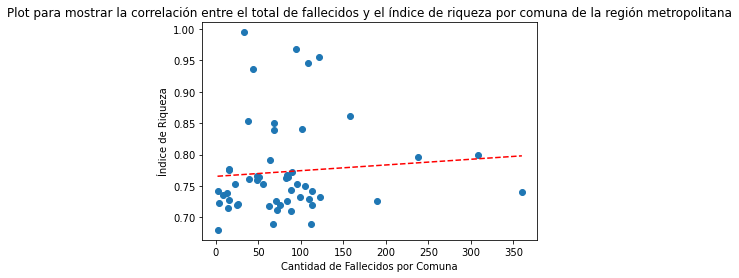

In [257]:
x = Resumen['CANTIDAD_FALLECIDOS']
y = Resumen['HDI']

print(np.corrcoef(x, y))

plt.scatter(x, y, marker = 'o') 
plt.title('Plot para mostrar la correlación entre el total de fallecidos y el índice de riqueza por comuna de la región metropolitana')
plt.xlabel('Cantidad de Fallecidos por Comuna')
plt.ylabel('Índice de Riqueza')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r--',color='red')
plt.show()

In [258]:
corr_test = pearsonr(x = Resumen['CANTIDAD_FALLECIDOS'], y = Resumen['HDI'])
print('El Coeficiente de Correlación de Pearson: ', corr_test[0])
print('Valor P: ', corr_test[1])

El Coeficiente de Correlación de Pearson:  0.08547017307912438
Valor P:  0.5468707954324522


[[1.         0.47901378]
 [0.47901378 1.        ]]


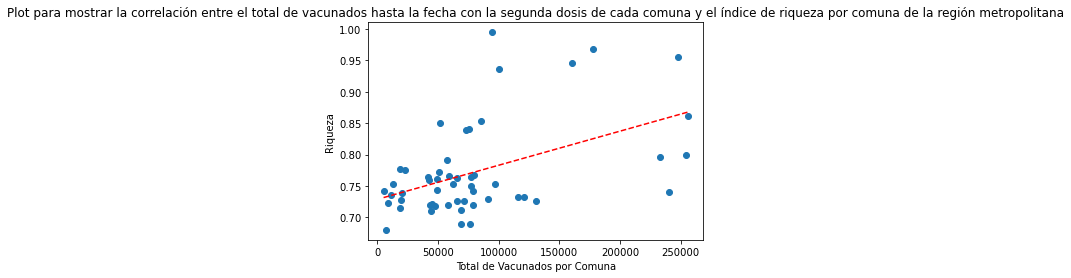

In [259]:
x = Resumen['TOTAL_VACUNADOS']
y = Resumen['HDI']

print(np.corrcoef(x, y))

plt.scatter(x, y, marker = 'o') 
plt.title('Plot para mostrar la correlación entre el total de vacunados hasta la fecha con la segunda dosis de cada comuna y el índice de riqueza por comuna de la región metropolitana')
plt.xlabel('Total de Vacunados por Comuna')
plt.ylabel('Riqueza')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r--',color='red')
plt.show()

In [260]:
correlacion = pearsonr(x = Resumen['TOTAL_VACUNADOS'], y = Resumen['HDI'])
print('El Coeficiente de Correlación de Pearson: ', correlacion[0])
print('Valor P: ', correlacion[1])

El Coeficiente de Correlación de Pearson:  0.47901378313362286
Valor P:  0.00032753620239571853


In [261]:
modelo = sm.ols(formula = 'CANTIDAD_FALLECIDOS ~TOTAL_VACUNADOS+HDI', data = Resumen).fit()

In [262]:
print(modelo.params)

Intercept          286.839047
TOTAL_VACUNADOS      0.001092
HDI               -380.856984
dtype: float64


In [263]:
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     CANTIDAD_FALLECIDOS   R-squared:                       0.812
Model:                             OLS   Adj. R-squared:                  0.805
Method:                  Least Squares   F-statistic:                     106.0
Date:                 Mon, 12 Jul 2021   Prob (F-statistic):           1.60e-18
Time:                         22:14:39   Log-Likelihood:                -250.65
No. Observations:                   52   AIC:                             507.3
Df Residuals:                       49   BIC:                             513.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         286.8390     4